#### Importing important libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import pickle

#### Loading the dataset:

In [2]:
df = pd.read_csv('Cesarean .csv')
df.head()

,Age,Delivey No,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,1,Timely,High,apt,No
1,26,2,Timely,Normal,apt,Yes
2,26,2,Premature,Normal,apt,No
3,28,1,Timely,High,apt,No
4,22,2,Timely,Normal,apt,Yes


In [3]:
df.tail()

,Age,Delivey No,Delivery No,Blood of Pressure,Heart Problem,Caesarian
75,27,2,Premature,Normal,apt,No
76,33,4,Timely,Normal,apt,Yes
77,29,2,Premature,High,apt,Yes
78,25,1,Latecomer,Low,apt,Yes
79,24,2,Latecomer,Normal,apt,No


In [4]:
df.rename(columns={'Delivery No':'Delivery Time'}, inplace=True)

In [5]:
# To know number od rows and column
df.shape

(80, 6)

In [6]:
# To know if missing value is preset and also to know dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                80 non-null     int64 
 1   Delivey No         80 non-null     int64 
 2   Delivery Time      80 non-null     object
 3   Blood of Pressure  80 non-null     object
 4   Heart Problem      80 non-null     object
 5   Caesarian          80 non-null     object
dtypes: int64(2), object(4)
memory usage: 3.9+ KB


In [7]:
# Five point summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,27.6875,5.017927,17.0,25.0,27.0,32.0,40.0
Delivey No,80.0,1.6625,0.794662,1.0,1.0,1.0,2.0,4.0


In [8]:
#To find no. of unique values in categorical columns

for col in df.select_dtypes(include=object).columns:
    print('No. of unique values in column '+col+':')
    print(df[col].value_counts(),'\n')

No. of unique values in column Delivery Time:
Timely       46
Premature    17
Latecomer    17
Name: Delivery Time, dtype: int64 

No. of unique values in column Blood of Pressure:
Normal    40
High      20
Low       19
low        1
Name: Blood of Pressure, dtype: int64 

No. of unique values in column Heart Problem:
apt      50
inept    30
Name: Heart Problem, dtype: int64 

No. of unique values in column Caesarian:
Yes    42
No     34
yes     4
Name: Caesarian, dtype: int64 



- We can see that in column 'Blood of Pressure' there are 4 unique instead of 3
- In column Caesarian there should be 2 instead of 3

In [9]:
# Replacing 'low' to 'Low' and 'yes' to 'Yes' 

df['Blood of Pressure'] = df['Blood of Pressure'].replace('low','Low')
df['Caesarian'] = df['Caesarian'].replace('yes','Yes')

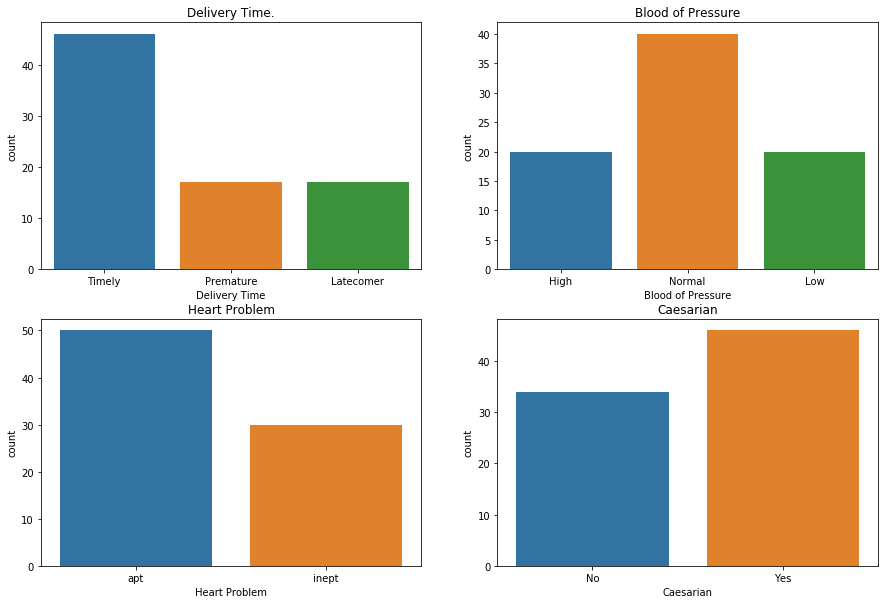

In [10]:
# Plotting countplot

fig = plt.figure(figsize=(15,10))

fig.add_subplot(221)
plt.title('Delivery Time.', fontsize=12)
sns.countplot(df['Delivery Time'])

fig.add_subplot(2,2,2)
plt.title('Blood of Pressure', fontsize=12)
sns.countplot(df['Blood of Pressure'])

fig.add_subplot(223)
plt.title('Heart Problem', fontsize=12)
sns.countplot(df['Heart Problem'])

fig.add_subplot(2,2,4)
plt.title('Caesarian', fontsize=12)
sns.countplot(df['Caesarian'])

plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include=object).columns:
    df[col] = le.fit_transform(df[col]) 

In [12]:
df.head()

,Age,Delivey No,Delivery Time,Blood of Pressure,Heart Problem,Caesarian
0,22,1,2,0,0,0
1,26,2,2,2,0,1
2,26,2,1,2,0,0
3,28,1,2,0,0,0
4,22,2,2,2,0,1


#### Splitting into train and test:

In [13]:
#Separting df_train in independent and dependent variable
X=df.drop(['Caesarian'],axis=1)
y=df['Caesarian']

In [14]:
#Splitting df_train in train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Modelling:

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

logreg = LogisticRegression(solver='liblinear', fit_intercept=True) 

logreg.fit(X_train, y_train)

y_prob_train = logreg.predict_proba(X_train)[:,1]
y_pred_train = logreg.predict (X_train)

print('Confusion Matrix - Train: ', '\n', confusion_matrix(y_train, y_pred_train))
print('Overall accuracy - Train: ', accuracy_score(y_train, y_pred_train))


y_prob = logreg.predict_proba(X_test)[:,1]
y_pred = logreg.predict (X_test)

print('Confusion Matrix - Test: ','\n', confusion_matrix(y_test, y_pred))
print('Overall accuracy - Test: ', accuracy_score(y_test, y_pred))

Confusion Matrix - Train:  
 [[12 12]
 [ 7 25]]
Overall accuracy - Train:  0.6607142857142857
Confusion Matrix - Test:  
 [[ 5  5]
 [ 1 13]]
Overall accuracy - Test:  0.75


In [16]:
#Fitting whole dataset
log_r = logreg.fit(X, y)

#### Saving model in pickle:

In [17]:
pickle.dump(log_r, open('caesarean.pkl','wb')) #wb->write binary